<a href="https://colab.research.google.com/github/lucash-h/SENG474/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/SENG 474/Assignment1/spambase_augmented.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.head())


   0.000  0.640  0.640.1  0.000.1  0.320  0.000.2  0.000.3  0.000.4  0.000.5  \
0   0.21   0.28     0.50      0.0   0.14     0.28     0.21     0.07     0.00   
1   0.06   0.00     0.71      0.0   1.23     0.19     0.19     0.12     0.64   
2   0.00   0.00     0.00      0.0   0.63     0.00     0.31     0.63     0.31   
3   0.00   0.00     0.00      0.0   0.63     0.00     0.31     0.63     0.31   
4   0.00   0.00     0.00      0.0   1.85     0.00     0.00     1.85     0.00   

   0.000.6  ...  0.000.816  0.000.817  0.000.818  0.000.819  0.000.820  \
0     0.94  ...       0.00        0.0        0.0       0.00       0.00   
1     0.25  ...       0.06        0.0        0.0       0.12       0.06   
2     0.63  ...       0.00        0.0        0.0       0.00       0.00   
3     0.63  ...       0.00        0.0        0.0       0.00       0.00   
4     0.00  ...       0.00        0.0        0.0       0.00       0.00   

   0.000.821  0.000.822  0.000.823  0.000.824  1  
0       0.00       0.00

In [ ]:
#now to split data into vectors
#each has 48 features of the frequency of some word
#this dataset has the original 57 features and a new feature for every pair of the 48 words and for any pair of words, the new feature is the sum of those words frequencies
#that means that there is 2^48 + 58 features? subract like pairs
#column asp is # 1186 so yea
#so vectors will be 1 * 1186 what the fuck



In [ ]:
import numpy as np

np.shape(df)

(4600, 1186)

In [29]:
#split into training/test data  ***might be worth adding labels ie last col***
#maybe randomize later
#3640-> train
#960 -> test
x = df.iloc[:,:-1] #features
y = df.iloc[:,-1] #label/last col

x_train = x[:3640]
y_train = y[:3640]
print(np.shape(x_train))
print(np.shape(y_train))

x_test = x[3640:]
y_test = y[3640:]
print(np.shape(x_test))
print(np.shape(y_test))

(3640, 1185)
(3640,)
(960, 1185)
(960,)


In [32]:
print(x_train.iloc[0])
print("SHAPE IS : " + str(np.shape(x_train.iloc[0])))

0.000        0.21
0.640        0.28
0.640.1      0.50
0.000.1      0.00
0.320        0.14
             ... 
0.000.820    0.00
0.000.821    0.00
0.000.822    0.00
0.000.823    0.00
0.000.824    0.00
Name: 0, Length: 1185, dtype: float64
SHAPE IS : (1185,)


In [33]:
print(x_test.iloc[0])
print("SHAPE IS : " + str(np.shape(x_test)))

0.000        0.0
0.640        0.0
0.640.1      0.0
0.000.1      0.0
0.320        0.0
            ... 
0.000.820    0.0
0.000.821    0.0
0.000.822    0.0
0.000.823    0.0
0.000.824    0.0
Name: 3640, Length: 1185, dtype: float64
SHAPE IS : (960, 1185)


In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "gini", random_state=0).fit(x_train,y_train)

In [36]:
import matplotlib.pyplot as plt

In [38]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

[Text(0.7467548195304154, 0.9791666666666666, 'x[910] <= 0.12\ngini = 0.5\nsamples = 3640\nvalue = [1828, 1812]'),
 Text(0.5321795282182606, 0.9375, 'x[55] <= 9.5\ngini = 0.398\nsamples = 2434\nvalue = [668, 1766]'),
 Text(0.639467173874338, 0.9583333333333333, 'True  '),
 Text(0.3133594466205517, 0.8958333333333334, 'x[332] <= 0.16\ngini = 0.375\nsamples = 619\nvalue = [464, 155]'),
 Text(0.2717802241095849, 0.8541666666666666, 'x[487] <= 0.07\ngini = 0.22\nsamples = 508\nvalue = [444, 64]'),
 Text(0.23517111274424385, 0.8125, 'x[51] <= 0.984\ngini = 0.174\nsamples = 487\nvalue = [440, 47]'),
 Text(0.18522755684185804, 0.7708333333333334, 'x[721] <= 0.415\ngini = 0.138\nsamples = 469\nvalue = [434, 35]'),
 Text(0.14740622324587654, 0.7291666666666666, 'x[380] <= 6.445\ngini = 0.109\nsamples = 449\nvalue = [423, 26]'),
 Text(0.13964800096977778, 0.6875, 'x[751] <= 1.925\ngini = 0.102\nsamples = 447\nvalue = [423, 24]'),
 Text(0.10279644515830864, 0.6458333333333334, 'x[256] <= 7.415\ng

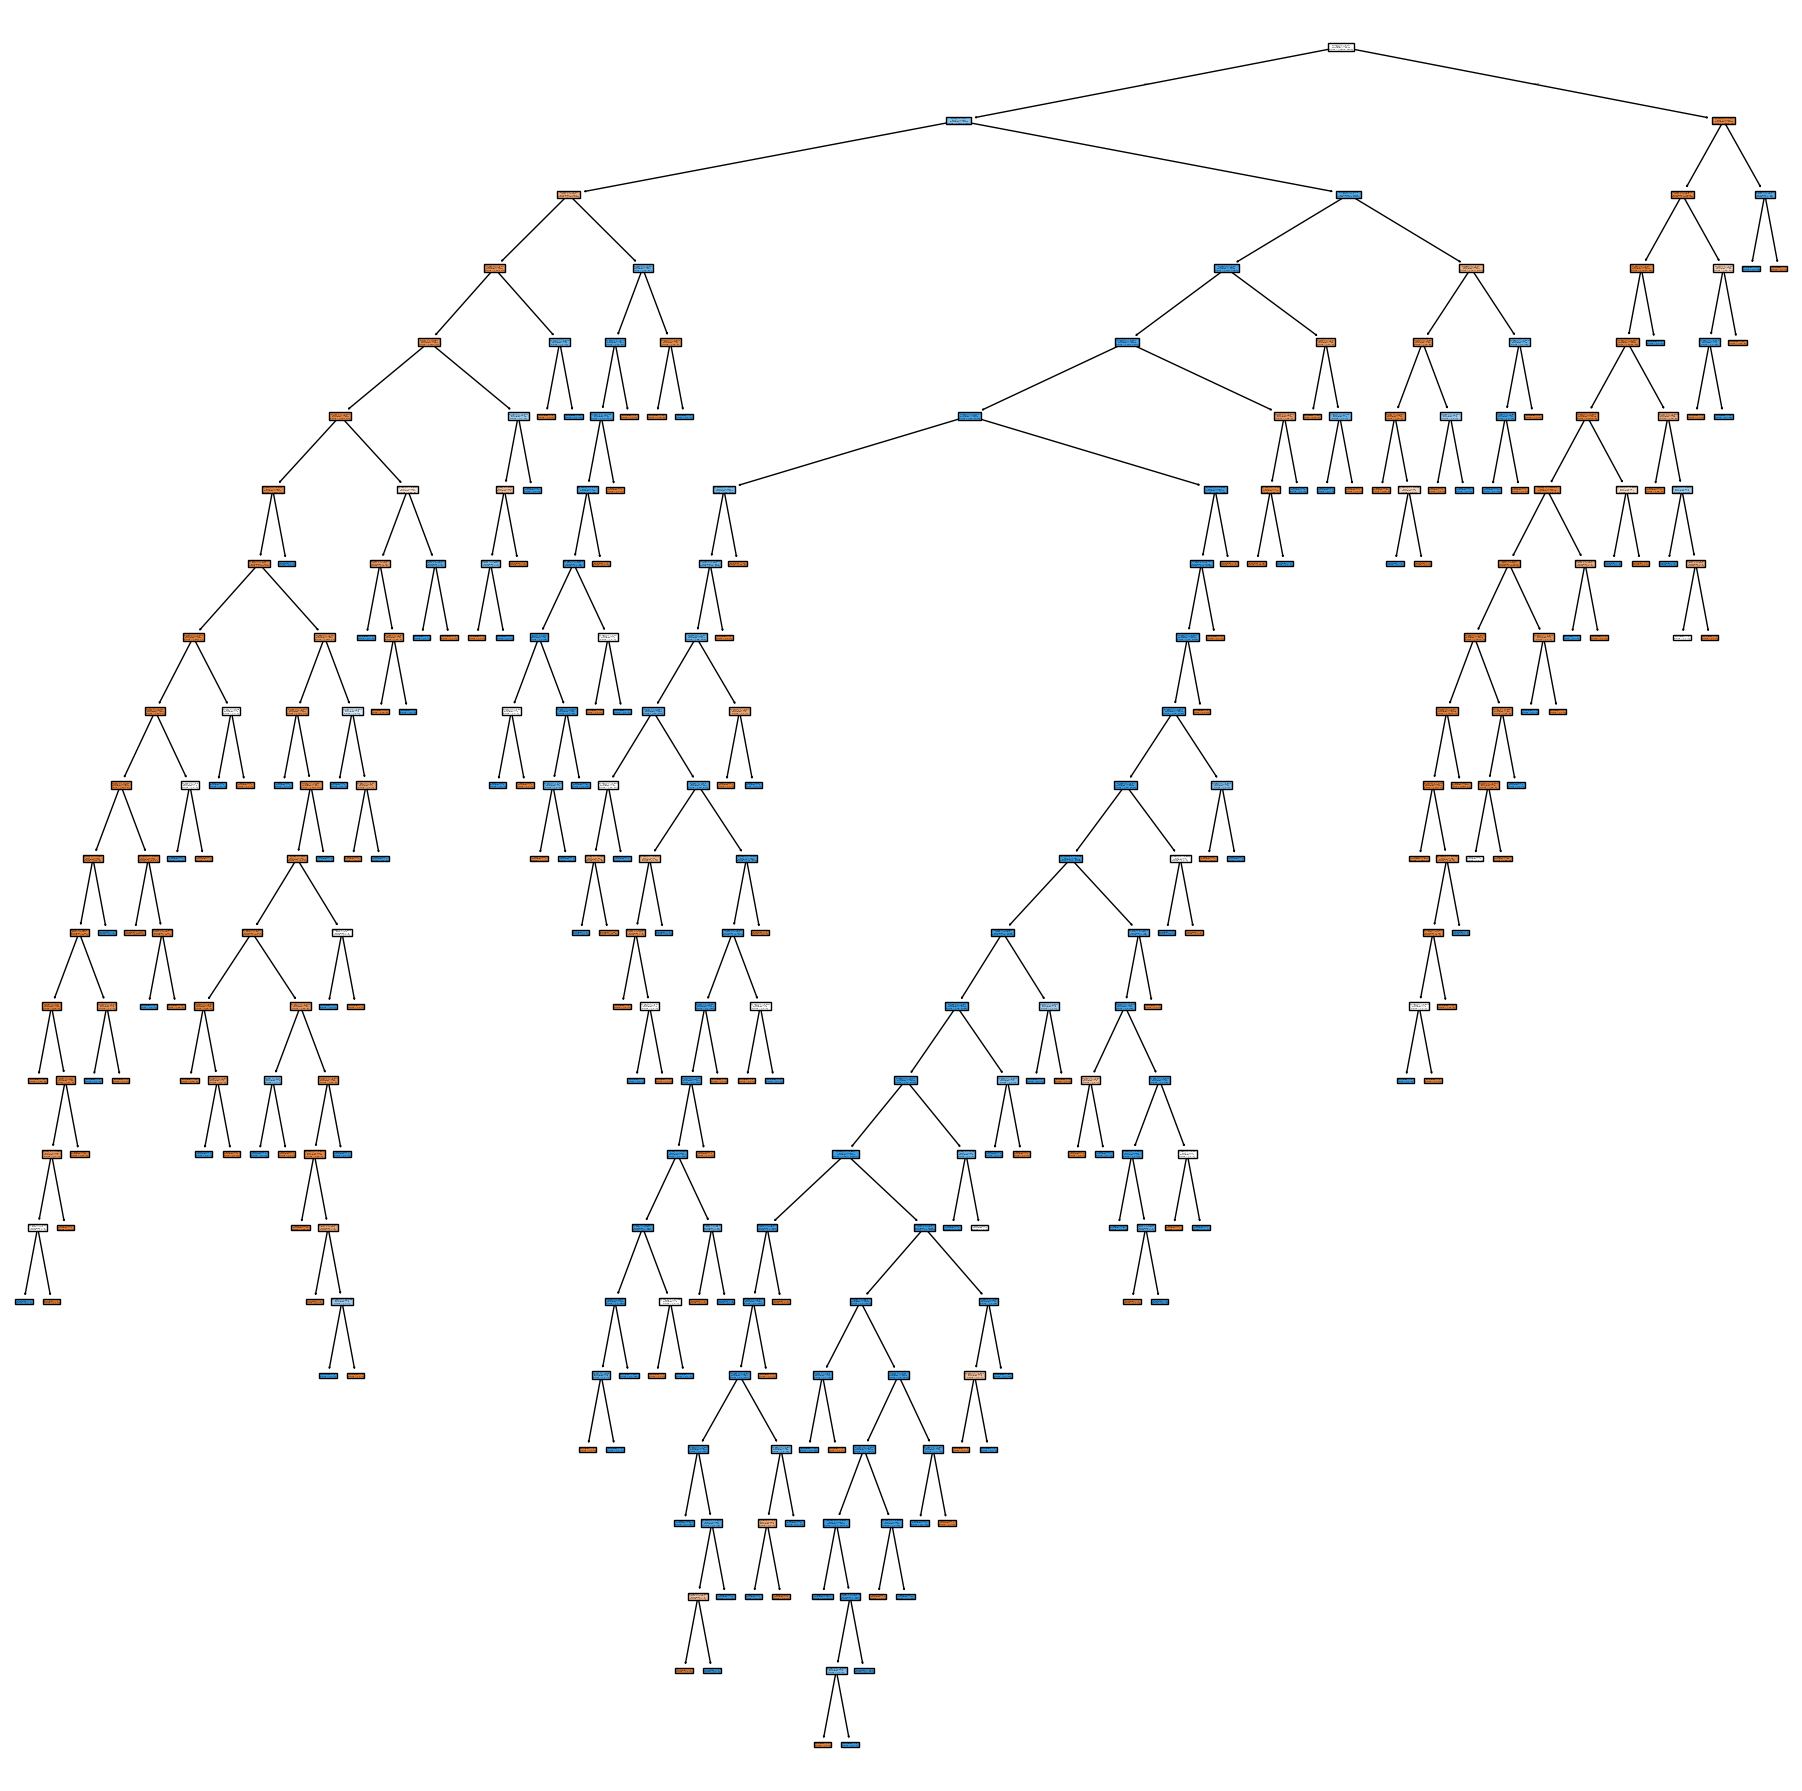

In [43]:
from sklearn.tree import plot_tree
from sklearn import tree


plt.figure(figsize=(23, 23))
plot_tree(dtc, filled=True)
# plt.show()
#text_representation = tree.export_text(dtc)
#print(text_representation)
